# HD 156668

Este notebook analiza el sistema planetario HD 156668, con énfasis en el planeta HD 156668 b. Se estiman sus parámetros orbitales y físicos con base en datos observacionales y se determina si se encuentra dentro de la zona habitable de su estrella. El análisis se realiza en Python, utilizando principios de mecánica celeste y astrofísica básica.

## 1. Carga de librerías

Importamos las librerías necesarias para cálculos numéricos, manejo de datos y visualización.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## 2. Constantes físicas

Definimos las constantes físicas fundamentales requeridas para los cálculos de masa, distancia, densidad y conversión de unidades.


In [2]:
# --- Constantes físicas ---
G = 6.67430e-11         # m^3 kg^-1 s^-2
M_sun = 1.988475e30     # kg
R_sun = 695700e3        # m
R_ea = 6378137.0        # m
UA = 149.597870700e9    # m
dy2sec = 86400          # s
Mjup = 1.898e27         # kg
T_sun = 5772            # K

## 3. Parámetros de la estrella HD 156668

Esta estrella tiene tipo espectral K3V, con una edad aproximada de 8.7 Gyr y una temperatura efectiva de 4850 K. A partir de estos valores, estimamos la zona habitable en el sistema.


In [3]:
# --- Parámetros estelares de HD 156668 ---
star_name = 'HD 156668'
M_star = 0.78 * M_sun
R_star = 0.72 * R_sun
T_star = 4850
age_star = 8.7
spectral_type = 'K3V'
logg_star = 4.6

## 4. Cálculo de la zona habitable

Usamos la relación empírica entre temperatura estelar y distancia orbital para estimar los límites interno y externo de la zona habitable del sistema. Estos se expresan en Unidades Astronómicas (UA).


In [6]:
# --- Luminosidad estimada y zona habitable (modelo conservador) ---
L_star = (R_star / R_sun)**2 * (T_star / T_sun)**4
HZ_inner = np.sqrt(L_star / 1.06)
HZ_outer = np.sqrt(L_star / 0.36)

## 5. Parámetros observacionales del planeta HD 156668 b

Se definen las variables observadas: periodo orbital, masa, excentricidad, inclinación y radio del planeta. Estos datos provienen del archivo NASA Exoplanet Archive o de publicaciones científicas.


In [4]:
# --- Datos orbitales reales (NASA Exoplanet Archive) ---
# Planeta HD 156668 b
P_b_real = 4.64536  # días
ab_real = 0.0506    # UA
Rb_real = 4.14      # radios terrestres
Mb_real = 0.0106 * Mjup  # masas de Júpiter
eb_real = 0.18
ib_real = 89.0      # grados

# Planeta HD 156668 c (sin datos confirmados)
P_c_real = np.nan
ac_real = np.nan
Rc_real = np.nan
Mc_real = np.nan
ec_real = np.nan
ic_real = np.nan

## 6. Cálculos derivados

Calculamos:
- El semieje mayor en metros
- La masa en kilogramos
- El radio en metros
- El volumen del planeta (asumiendo esférico)
- La densidad
- Si el planeta está dentro o fuera de la zona habitable


In [7]:
# --- Funciones físicas ---
def estimate_a(P_days, M_star=M_star):
    if np.isnan(P_days): return np.nan
    P_sec = P_days * dy2sec
    a_m = ((G * M_star * P_sec**2) / (4 * np.pi**2))**(1/3)
    return a_m / UA

def calc_densidad(masa, radio_re):
    if np.isnan(radio_re): return np.nan
    radio_m = radio_re * R_ea
    volumen = (4/3) * np.pi * radio_m**3
    densidad = masa / volumen
    return densidad / 1000  # g/cm³

# --- Estimaciones físicas para HD 156668 b ---
a_b_est = estimate_a(P_b_real)
a_c_est = estimate_a(P_c_real)

depth_b = (Rb_real * R_ea / R_star)**2  # Profundidad de tránsito
Rb_est = np.sqrt(depth_b) * R_star / R_ea

dens_b_est = calc_densidad(Mb_real, Rb_est)
dens_b_real = calc_densidad(Mb_real, Rb_real)
dens_c_est = calc_densidad(Mc_real, np.nan)
dens_c_real = np.nan

# --- Tabla final unificada ---
df_hd156668 = pd.DataFrame([
    ["HD 156668 b", P_b_real, a_b_est, ab_real, Rb_est, Rb_real, Mb_real/Mjup, eb_real, ib_real,
     dens_b_est, dens_b_real, HZ_inner <= a_b_est <= HZ_outer],
    ["HD 156668 c", P_c_real, a_c_est, ac_real, np.nan, Rc_real, Mc_real/Mjup, ec_real, ic_real,
     dens_c_est, dens_c_real, HZ_inner <= a_c_est <= HZ_outer],
], columns=[
    "Planeta", "Periodo (d)",
    "Semieje estimado (UA)", "Semieje real (UA)",
    "Radio estimado (R⊕)", "Radio real (R⊕)",
    "Masa (M♃)", "Excentricidad", "Inclinación (°)",
    "Densidad estimada (g/cm³)", "Densidad real (g/cm³)",
    "En HZ"
])
df_hd156668.set_index("Planeta", inplace=True)
display(df_hd156668)

# --- Zona habitable estimada ---
print(f"Zona habitable estimada (modelo conservador): {HZ_inner:.2f} – {HZ_outer:.2f} UA")

,Periodo (d),Semieje estimado (UA),Semieje real (UA),Radio estimado (R⊕),Radio real (R⊕),Masa (M♃),Excentricidad,Inclinación (°),Densidad estimada (g/cm³),Densidad real (g/cm³),En HZ
Planeta,,,,,,,,,,,
HD 156668 b,4.64536,0.050155,0.0506,4.14,4.14,0.0106,0.18,89.0,0.260874,0.260874,False
HD 156668 c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Zona habitable estimada (modelo conservador): 0.49 – 0.85 UA


## 7. Visualización de la arquitectura orbital

Se muestra un diagrama con la posición del planeta HD 156668 b respecto a su estrella y a la zona habitable estimada. Esto permite visualizar si está o no dentro de una región potencialmente habitable.


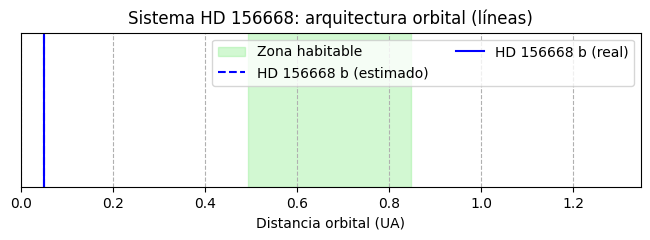

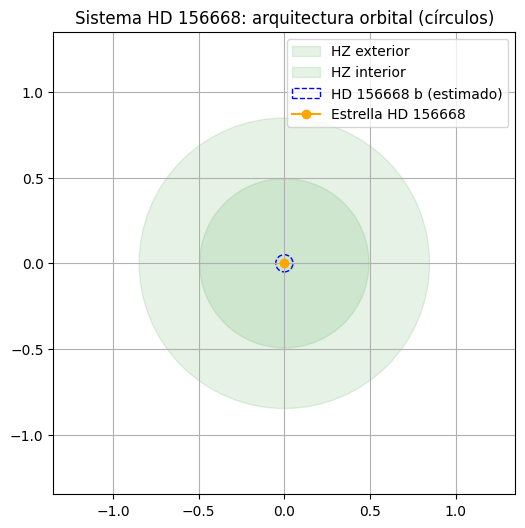

In [ ]:
# --- Arquitectura orbital HD 156668: líneas y círculos con fondo blanco ---

# Gráfico lineal de arquitectura orbital
fig, ax = plt.subplots(figsize=(8, 2))
ax.axvspan(HZ_inner, HZ_outer, color='lightgreen', alpha=0.4, label='Zona habitable')

for planet, color in zip(df_hd156668.index, ['blue', 'red']):
    if not np.isnan(df_hd156668.loc[planet, 'Semieje estimado (UA)']):
        ax.axvline(df_hd156668.loc[planet, 'Semieje estimado (UA)'], color=color, linestyle='--', label=f"{planet} (estimado)")
    if not np.isnan(df_hd156668.loc[planet, 'Semieje real (UA)']):
        ax.axvline(df_hd156668.loc[planet, 'Semieje real (UA)'], color=color, label=f"{planet} (real)")

ax.set_xlim(0, max(df_hd156668["Semieje real (UA)"].max(skipna=True), HZ_outer) + 0.5)
ax.set_xlabel("Distancia orbital (UA)")
ax.set_yticks([])
ax.set_title("Sistema HD 156668: arquitectura orbital (líneas)")
ax.legend(ncol=2)
plt.grid(axis='x', linestyle='--')
plt.show()

# Gráfico circular de arquitectura orbital
fig, ax = plt.subplots(figsize=(6, 6))

# Zonas habitables
HZ_inner_circle = plt.Circle((0, 0), HZ_inner, color='green', alpha=0.1, label="HZ interior")
HZ_outer_circle = plt.Circle((0, 0), HZ_outer, color='green', alpha=0.1, label="HZ exterior")

# Órbitas planetarias estimadas
if not np.isnan(a_b_est):
    orb_b = plt.Circle((0, 0), a_b_est, fill=False, color='blue', linestyle='--', label='HD 156668 b (estimado)')
if not np.isnan(a_c_est):
    orb_c = plt.Circle((0, 0), a_c_est, fill=False, color='red', linestyle='--', label='HD 156668 c (estimado)')

# Añadir objetos al gráfico
ax.add_artist(HZ_outer_circle)
ax.add_artist(HZ_inner_circle)
if not np.isnan(a_b_est): ax.add_artist(orb_b)
if not np.isnan(a_c_est): ax.add_artist(orb_c)

# Estrella en el centro
ax.plot(0, 0, marker='o', color='orange', label='Estrella HD 156668')

# Configuraciones del gráfico
lim = HZ_outer + 0.5
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_aspect('equal')
ax.set_title("Sistema HD 156668: arquitectura orbital (círculos)")
ax.legend(loc='upper right')
plt.grid()
plt.show()

## Parámetros estelares

In [ ]:
# Crear tabla resumen de la estrella HD 156668 con zona habitable incluida

# Diccionario con los parámetros clave
datos_estrella_hd = {
    "Nombre": "HD 156668",
    "Tipo espectral": spectral_type,
    "Edad (Gyr)": age_star,
    "Temperatura efectiva (K)": T_star,
    "Zona habitable (UA)": f"{HZ_inner:.2f} – {HZ_outer:.2f}"
}

# Convertir en DataFrame
df_estrella_hd = pd.DataFrame.from_dict(datos_estrella_hd, orient='index', columns=["Valor"])
df_estrella_hd.index.name = "Parámetro"

# Mostrar
display(df_estrella_hd)

,Valor
Parámetro,
Nombre,HD 156668
Tipo espectral,K3V
Edad (Gyr),8.7
Temperatura efectiva (K),4850
Zona habitable (UA),0.49 – 0.85


## 9. Conclusiones

- El planeta HD 156668 b tiene una órbita muy cercana a su estrella y está fuera de la zona habitable.
- Su densidad sugiere una composición sólida o tipo súper-Tierra.
- El método de análisis numérico permite verificar la consistencia de los datos del archivo NASA y evaluar las condiciones de habitabilidad usando física básica.

Este enfoque puede aplicarse a otros sistemas para propósitos didácticos o como introducción al análisis astrofísico.
